In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope



import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight

In [2]:
Folder=r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output"
FolderSave=r"C:\Users\zz587-admin\Documents\sleep center paper\figure\python\cm"
#Data_ver=r'\Feat_pred_v5'
Data_ver=r'\Feat_detect_v1'
Folder=Folder + Data_ver 

path=Folder+r'\featureAll'+Data_ver+"_feature_data.mat"

data = sio.loadmat(path)
featureNCS = data['featureNCS']
featureNCS=np.nan_to_num(featureNCS, nan=0,posinf=1000)
# featureNCS=np.delete(featureNCS,np.arange(16,37),1)
featureNCS_wo = featureNCS[:,0:-4]
labelNCS = data['labelNCS']
labelNCS_2 = data['labelNCS_2']
labelNCS_3 = data['labelNCS_3']
labelNCS_4 = data['labelNCS_4']



featurePSG= data['featurePSG2']
featurePSG=np.nan_to_num(featurePSG, nan=0,posinf=1000)
featurePSG_wo = featurePSG[:,0:-4]
labelPSG = data['labelPSG2']
labelPSG_2 = data['labelPSG2_2']
labelPSG_3 = data['labelPSG2_3']
labelPSG_4 = data['labelPSG2_4']
caseNumNCS=data['caseNumNCS']
# caseNumPSG=data['caseNumPSG']
caseNumPSG=data['caseNumPSG2']


featureNCS_l=featureNCS
featureNCS_wo_l = featureNCS[:,0:-4]
featurePSG_l=featurePSG
featurePSG_wo_l = featurePSG[:,0:-4]

featureNCS_s=np.delete(featureNCS,np.arange(16,37),1)
featureNCS_wo_s = featureNCS_s[:,0:-4]
featurePSG_s=np.delete(featurePSG,np.arange(16,37),1)
featurePSG_wo_s = featurePSG_s[:,0:-4] 

# a=np.unique(labelNCS_3_del)

In [5]:


#function for k-fold CV. 
# return  y  =(truth,predict),  acc_all = all accuracy of all folds  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp


#opt[0]  = 0 use balanced sample weight   opt[0]  = 0  specify weight
def k_foldCV(x,y,opt,w):
    rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1,random_state=0)
    b=10
    num=6
    y=y.ravel()
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    
    bal='balanced'
    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'min(spo2)', 'percent(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', ',min(spo2)', 'percent(spo2)']
    
    for train_ind, test_ind in rkf.split(x,y):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
        
        
        #balance the sample 
        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
            #clf = DecisionTreeClassifier(max_depth=10,class_weight=w,random_state=0).fit(X_train,y_train) 
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight="balanced").fit(X_train,y_train)
        #clf = SVC(C=3, kernel="rbf").fit(X_train,y_train)
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)
    #clf = RandomForestClassifier(max_depth=5,n_estimators=50,max_features=None,random_state=ran).fit(X_train,y_train)
    # clf = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)


    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)


    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
    
    print(cm)
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
         
        print('acc=' + str(round(acc, 3)),'sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))  
    else:  
        print(acc) 

    return y,acc_all,acc,cm,featureName2,importance2


#function for subject-independent CV.  
#input: x=features y=labels  group= case group 
# return  y  =(truth,predict),  acc_all = all accuracy for all cases  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp

def groupCV(x,y,group,opt,w):
    a=5
    b=10
    num=5
    rkf = LeaveOneGroupOut()
    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    y=y.ravel()
    group=group.ravel()
   
    
    for train_ind, test_ind in rkf.split(x,y,group):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
                    
        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
            #clf = DecisionTreeClassifier(max_depth=10,class_weight=w,random_state=0).fit(X_train,y_train) 
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight='balanced').fit(X_train,y_train)
        
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)
        

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)



    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)

    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
   
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        print('acc=' + str(round(acc, 3)),'sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))  
    else:  
        print(acc) 
    

    return y,acc_all,acc,cm,featureName2,importance2



# get sensitivity and precision from confusion matrix 
def cm_parameter(cm):
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        spe=cm[0,0]/(cm[0,0]+cm[0,1])
        
        
    print('sen=' + str(round(sen, 3)) +  ' spe=' + str(round(spe, 3)))    
    return sen,spe


In [4]:
# detect outlier in normal epoch & disorder epoch. 
def Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,opt0,opt1,a):
    a0=a[0]   # outlier rate for normal epoch
    a1=a[1]   # outlier rate for disorder epoch

    idx_0=np.where( labelNCS_3 == 0 )[0]  
    caseNumNCS_0=caseNumNCS[idx_0]
    featureNCS_0=featureNCS[idx_0,:]
    featureNCS_wo_0=featureNCS_wo[idx_0,:]
    labelNCS_3_0 = labelNCS_3[idx_0]
    labelNCS_0 = labelNCS[idx_0]




    idx_1=np.where( labelNCS_3 == 1 )[0]  
    caseNumNCS_1=caseNumNCS[idx_1]
    featureNCS_1=featureNCS[idx_1,:]
    featureNCS_wo_1=featureNCS_wo[idx_1,:]
    labelNCS_3_1 = labelNCS_3[idx_1] 
    labelNCS_1 = labelNCS[idx_1] 

    # different outlier methods (4)
    # clf=OneClassSVM(nu=0.25)
    # clf=EllipticEnvelope(contamination=0.1)
    # clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    if opt0=='forest':
        clf0 =IsolationForest(contamination=a0,random_state=0)
    if opt0=='local':
        clf0 =LocalOutlierFactor(n_neighbors=50, contamination=a0)
    if opt0=='SVM':
        clf0 =OneClassSVM(nu=a0)
    if opt0=='covar':
        clf0 =EllipticEnvelope(contamination=a0)
 

 

    lier_0 = clf0.fit_predict(featureNCS_wo_0)
    # 1 inlier, -1 outlier

    #delete some bad cases in 0 label    idx_0_del: after delete outliers, remaining index 
    idx_0_del=np.where( lier_0 == 1 )[0]  
    caseNumNCS_0_del=caseNumNCS_0[idx_0_del]
    featureNCS_0_del=featureNCS_0[idx_0_del,:]
    featureNCS_wo_0_del=featureNCS_wo_0[idx_0_del,:]
    labelNCS_3_0_del = labelNCS_3_0[idx_0_del]
    labelNCS_0_del = labelNCS_0[idx_0_del]

    if a1!=0:
        if opt1=='forest':
            clf1 =IsolationForest(contamination=a1,random_state=0)
        if opt1=='local':
            clf1 =LocalOutlierFactor(n_neighbors=50, contamination=a1)
        if opt1=='SVM':
            clf1 =OneClassSVM(nu=a1)
        if opt1=='covar':
            clf1 =EllipticEnvelope(contamination=a1)
        lier_1 = clf1.fit_predict(featureNCS_wo_1)
        # 1 inlier, -1 outlier

        #delete some bad cases in 1 label 
        idx_1_del=np.where( lier_1 == 1 )[0]

    # if not delete outlier in disorder 
    if a1==0:
        idx_1_del=np.arange(0,len(caseNumNCS_1))

    caseNumNCS_1_del=caseNumNCS_1[idx_1_del]
    featureNCS_1_del=featureNCS_1[idx_1_del,:]
    featureNCS_wo_1_del=featureNCS_wo_1[idx_1_del,:]
    labelNCS_3_1_del = labelNCS_3_1[idx_1_del]
    labelNCS_1_del = labelNCS_1[idx_1_del]


    featureNCS_del=np.vstack((featureNCS_0_del,featureNCS_1_del))
    featureNCS_wo_del=np.vstack((featureNCS_wo_0_del,featureNCS_wo_1_del))
    caseNumNCS_del=np.vstack((caseNumNCS_0_del,caseNumNCS_1_del))
    labelNCS_3_del=np.vstack((labelNCS_3_0_del,labelNCS_3_1_del))
    labelNCS_del=np.vstack((labelNCS_0_del,labelNCS_1_del))


    return featureNCS_del,featureNCS_wo_del,caseNumNCS_del,labelNCS_3_del,labelNCS_del


In [6]:
## delete some data with bad performance 
# test over deleted data 
# long features 
opt1=[0]
opt2=[1]
w1={0:1,1:2.2}
w2={0:1,1:2}
featureNCS=featureNCS_s
featureNCS_wo=featureNCS_wo_s
featurePSG=featurePSG_s
featurePSG_wo=featurePSG_wo_s

r=np.array([0.1,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r)
featurePSG_del1,featurePSG_wo_del1,caseNumPSG_del1,labelPSG_3_del1,labelPSG_del1=\
    Del_outlier(featurePSG,featurePSG_wo,labelPSG,labelPSG_3,caseNumPSG,'forest','forest',r)


y_NCS_del1,acc_all_NCS_del1,acc_NCS_del1,cm_NCS_del1,feat_NCS_del1,impt_NCS_del1=k_foldCV(featureNCS_del1,labelNCS_3_del1,opt2,w1)
y_NCS_wo_del1,acc_all_NCS_wo_del1,acc_NCS_wo_del1,cm_NCS_wo_del1,feat_NCS_wo_del1,impt_NCS_wo_del1=k_foldCV(featureNCS_wo_del1,labelNCS_3_del1,opt1,w2)


y_PSG_del1,acc_all_PSG_del1,acc_PSG_del1,cm_PSG_del1,feat_PSG_del1,impt_PSG_del1=k_foldCV(featurePSG_del1,labelPSG_3_del1,opt2,w1)
y_PSG_wo_del1,acc_all_PSG_wo_del1,acc_PSG_wo_del1,cm_PSG_wo_del1,feat_PSG_wo_del1,impt_PSG_wo_del1=k_foldCV(featurePSG_wo_del1,labelPSG_3_del1,opt1,w2)


[[19913  2355]
 [ 1191  8849]]
acc=0.89 sen=0.881 spe=0.894
[[21469   799]
 [ 3667  6373]]
acc=0.862 sen=0.635 spe=0.964
[[12579  1687]
 [  986  3571]]
acc=0.858 sen=0.784 spe=0.882
[[11603  2663]
 [ 1675  2882]]
acc=0.77 sen=0.632 spe=0.813


In [6]:
# group CV  subject -independent 
# auto class weight 

opt1=[0]
opt2=[1]
w1={0:1,1:4}
w2={0:1,1:3}

r=np.array([0.1,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r)

y_NCS_del1_g,acc_all_NCS_del1_g,acc_NCS_del1_g,cm_NCS_del1_g,feat_NCS_del1_g,impt_NCS_del1_g=\
    groupCV(featureNCS_del1,labelNCS_3_del1,caseNumNCS_del1,opt1,w1)
y_NCS_wo_del1_g,acc_all_NCS_wo_del1_g,acc_NCS_wo_del1_g,cm_NCS_wo_del1_g,feat_NCS_wo_del1_g,impt_NCS_wo_del1_g=\
    groupCV(featureNCS_wo_del1,labelNCS_3_del1,caseNumNCS_del1,opt1,w2)


acc=0.889 sen=0.831 spe=0.916
acc=0.844 sen=0.604 spe=0.952


In [7]:
y_PSG_del1_g,acc_all_PSG_del1_g,acc_PSG_del1_g,cm_PSG_del1_g,feat_PSG_del1_g,impt_PSG_del1_g=\
    groupCV(featurePSG_del1,labelPSG_3_del1,caseNumPSG_del1,opt1,w2)
y_PSG_wo_del1_g,acc_all_PSG_wo_del1_g,acc_PSG_wo_del1_g,cm_PSG_wo_del1_g,feat_PSG_wo_del1_g,impt_PSG_wo_del1_g=\
    groupCV(featurePSG_wo_del1,labelPSG_3_del1,caseNumPSG_del1,opt1,w2)

acc=0.855 sen=0.743 spe=0.891
acc=0.738 sen=0.567 spe=0.792


In [8]:
# 7 class result 

y_NCS_del1_fc,acc_all_NCS_del1_fc,acc_NCS_del1_fc,cm_NCS_del1_fc,feat_NCS_del1_fc,impt_NCS_del1_fc=k_foldCV(featureNCS_del1,labelNCS_del1,opt1,w2)
y_NCS_wo_del1_fc,acc_all_NCS_wo_del1_fc,acc_NCS_wo_del1_fc,cm_NCS_wo_del1_fc,feat_NCS_wo_del1_fc,impt_NCS_wo_del1_fc=k_foldCV(featureNCS_wo_del1,labelNCS_del1,opt1,w2)


y_PSG_del1_fc,acc_all_PSG_del1_fc,acc_PSG_del1_fc,cm_PSG_del1_fc,feat_PSG_del1_fc,impt_PSG_del1_fc=k_foldCV(featurePSG_del1,labelPSG_del1,opt1,w2)
y_PSG_wo_del1_fc,acc_all_PSG_wo_del1_fc,acc_PSG_wo_del1_fc,cm_PSG_wo_del1_fc,feat_PSG_wo_del1_fc,impt_PSG_wo_del1_fc=k_foldCV(featurePSG_wo_del1,labelPSG_del1,opt1,w2)

[[15425  1167  2726  1452   484    38   147]
 [   80   342    18    43    14     1     5]
 [   88     3   212    14     2     0     7]
 [  836   159   217  4598  1353    83   428]
 [  132    35    33   694   843    76    89]
 [    1     0     2    20    25    13     2]
 [   40     6    14   136    49     2   154]]
0.6681626841649128
[[14765  1250  2326   998  1209   180   711]
 [  142   236    33    54    24     3    11]
 [  134    14    71    58    28     1    20]
 [ 1972   266   467  3255  1025    60   629]
 [  519    76   107   633   421    16   130]
 [   31     2     4    20     5     0     1]
 [   97     9    31   158    44     0    62]]
0.5822087408691345
[[9835  927 1205 1370  377    0   57]
 [  54  152    4   22    7    1    0]
 [  87    3  147   16    2    0    0]
 [ 604   73   80 1975  651   12   88]
 [  86   17   20  304  384   15   26]
 [   2    0    0   13   14    3    2]
 [  26    0    2   72   21    1   66]]
0.6673750199224353
[[8242 1470  948 2052  936   12  111]
 [  55

In [7]:
def plotfigFull(cm,acc,feat,impt,CVmethod,tle):

    labelNum=str(3)  #labelling method 1,2,3,4
    size=18
    name1=["True 0", "True 1"]
    name2=["Pred 0", "Pred 1"]
    w=12 #fig size 1      change when label num change
    h=8   #fig size 2
    a=2   #txt position 1   change when label num change
    b=1   #txt position 2

    sen,spe=cm_parameter(cm)
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=1.5)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size})
    s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nspecificity={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
        format(n=acc,n11=sen,n12=spe,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
    plt.text(a,b,s01,fontsize=size) 
    
    tleSave=tle+ labelNum +CVmethod
    plt.title(tleSave)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    FolderSave=r"C:/Users/zz587-admin/Documents/sleep center paper/figure/python/cm_detect_phase/"
    plt.savefig(FolderSave+tleSave+'fullVer'+r".png",dpi=300)
    #plt.savefig(FolderSave+tleSave+r".svg")

sen=0.881 spe=0.894
sen=0.635 spe=0.964
sen=0.784 spe=0.882
sen=0.632 spe=0.813
sen=0.881 spe=0.894
sen=0.635 spe=0.964
sen=0.784 spe=0.882
sen=0.632 spe=0.813


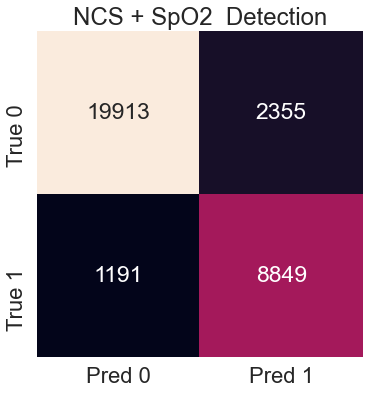

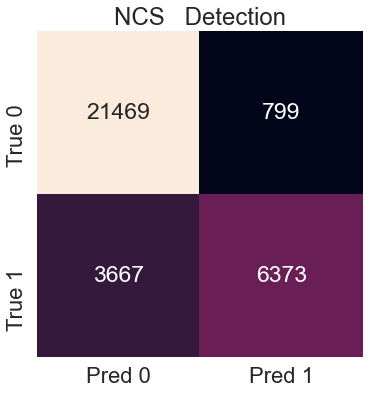

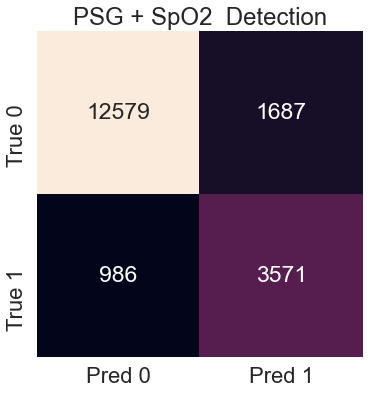

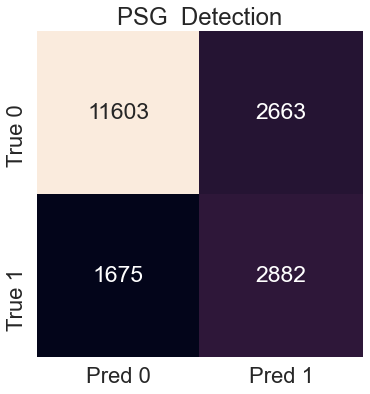

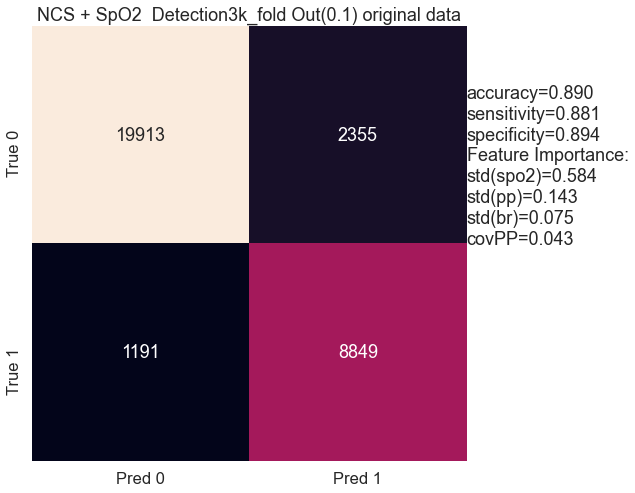

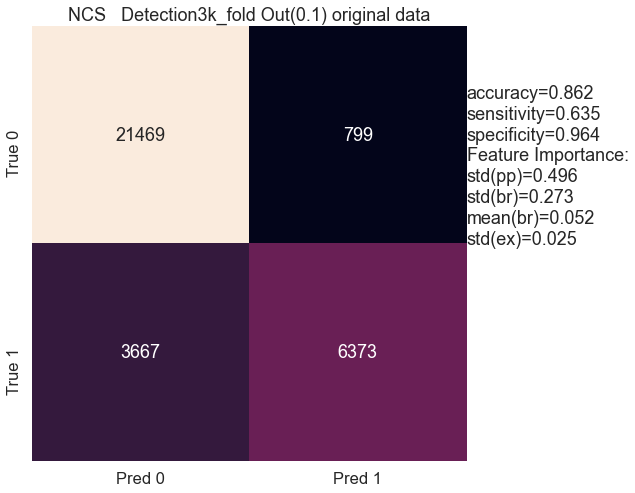

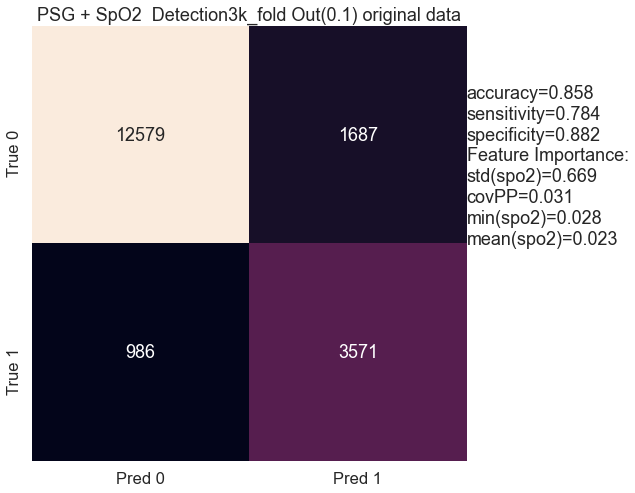

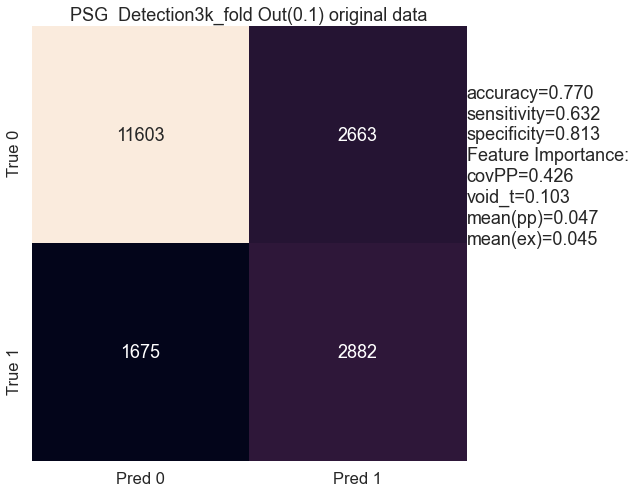

In [8]:
def plotfig(cm,acc,feat,impt,CVmethod,tle):

    labelNum=str(3)  #labelling method 1,2,3,4
    size=18
    name1=["True 0", "True 1"]
    name2=["Pred 0", "Pred 1"]
    w=7 #fig size 1      change when label num change
    h=6   #fig size 2
    a=2   #txt position 1   change when label num change
    b=1   #txt position 2

    sen,pre=cm_parameter(cm)
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':23})

    
    tleSave=tle+ labelNum +CVmethod
    plt.title(tle)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    FolderSave=r"C:/Users/zz587-admin/Documents/sleep center paper/figure/python/cm_detect_phase/"
    plt.savefig(FolderSave+tleSave+r".png",dpi=300)
    #plt.savefig(FolderSave+tleSave+r".svg")


CVmethod1='k_fold Out(0.1) original data'
CVmethod2='k_fold Out(0.1) original data'
tle1='NCS + SpO2  Detection'
plotfig(cm_NCS_del1,acc_NCS_del1,feat_NCS_del1,impt_NCS_del1,CVmethod1,tle1)
tle2='NCS   Detection'
plotfig(cm_NCS_wo_del1,acc_NCS_wo_del1,feat_NCS_wo_del1,impt_NCS_wo_del1,CVmethod2,tle2)
tle3='PSG + SpO2  Detection'
plotfig(cm_PSG_del1,acc_PSG_del1,feat_PSG_del1,impt_PSG_del1,CVmethod1,tle3)
tle4='PSG  Detection'
plotfig(cm_PSG_wo_del1,acc_PSG_wo_del1,feat_PSG_wo_del1,impt_PSG_wo_del1,CVmethod2,tle4)

plotfigFull(cm_NCS_del1,acc_NCS_del1,feat_NCS_del1,impt_NCS_del1,CVmethod1,tle1)
plotfigFull(cm_NCS_wo_del1,acc_NCS_wo_del1,feat_NCS_wo_del1,impt_NCS_wo_del1,CVmethod2,tle2)
plotfigFull(cm_PSG_del1,acc_PSG_del1,feat_PSG_del1,impt_PSG_del1,CVmethod1,tle3)
plotfigFull(cm_PSG_wo_del1,acc_PSG_wo_del1,feat_PSG_wo_del1,impt_PSG_wo_del1,CVmethod2,tle4)

sen=0.831 spe=0.916
sen=0.604 spe=0.952
sen=0.743 spe=0.891
sen=0.567 spe=0.792
sen=0.831 spe=0.916
sen=0.604 spe=0.952
sen=0.743 spe=0.891
sen=0.567 spe=0.792


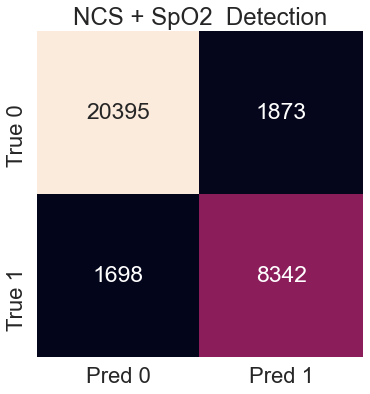

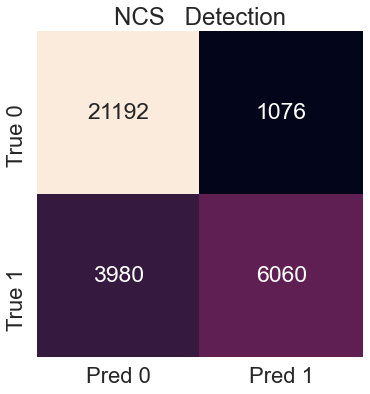

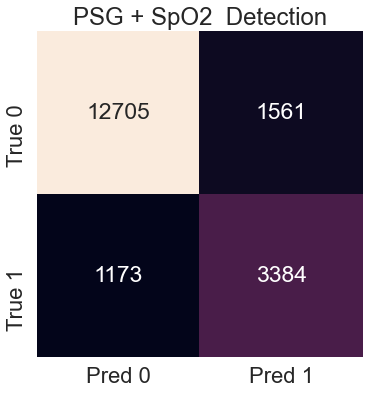

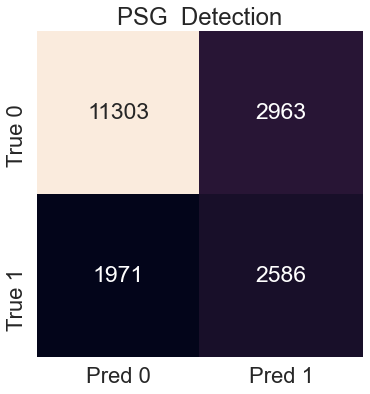

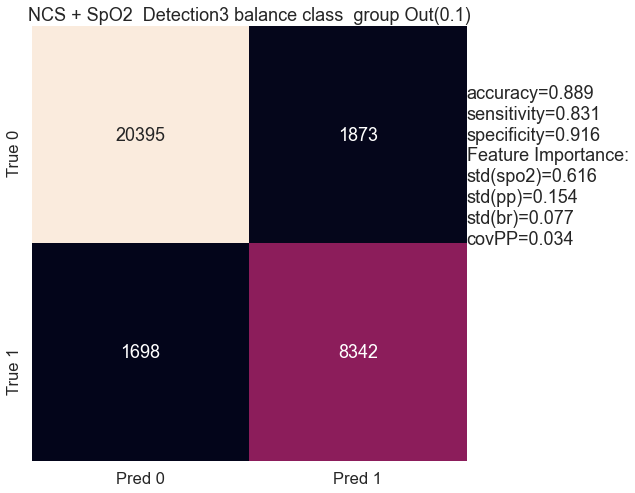

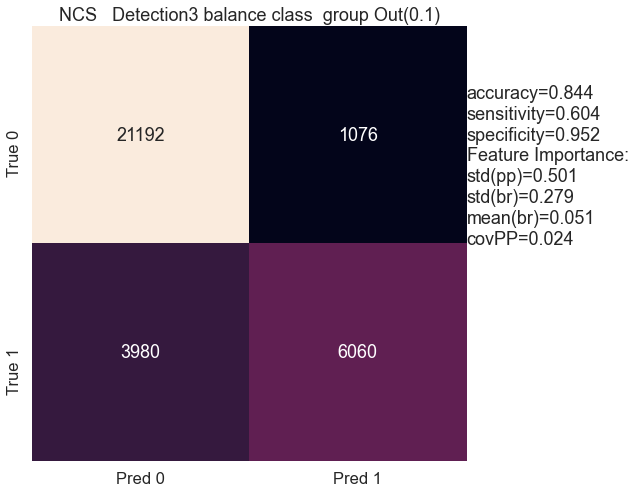

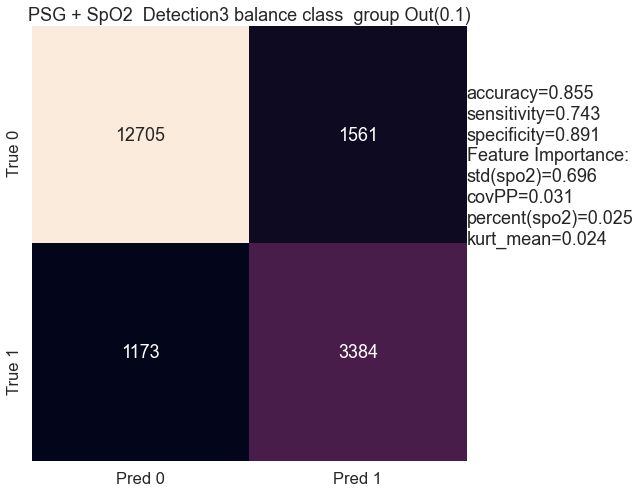

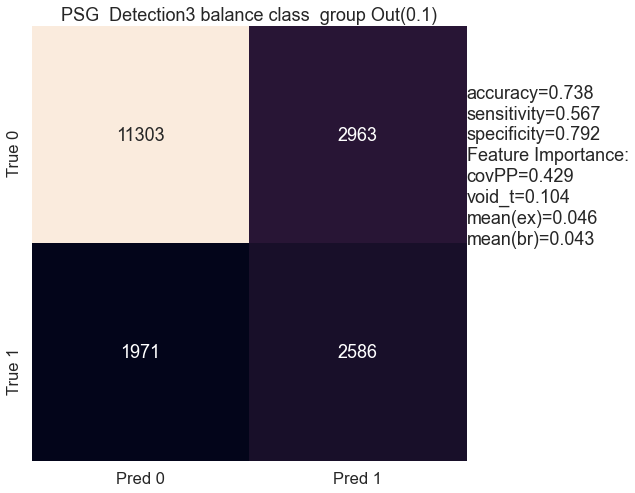

In [11]:
#CVmethod='long features Weighted class1_2.5  group Outlier Removed(0.2) Isolation Forest'


CVmethod2=' balance class  group Out(0.1)'
plotfig(cm_NCS_del1_g,acc_NCS_del1_g,feat_NCS_del1_g,impt_NCS_del1_g,CVmethod2,tle1)
plotfig(cm_NCS_wo_del1_g,acc_NCS_wo_del1_g,feat_NCS_wo_del1_g,impt_NCS_wo_del1_g,CVmethod2,tle2)
plotfig(cm_PSG_del1_g,acc_PSG_del1_g,feat_PSG_del1_g,impt_PSG_del1_g,CVmethod2,tle3)
plotfig(cm_PSG_wo_del1_g,acc_PSG_wo_del1_g,feat_PSG_wo_del1_g,impt_PSG_wo_del1_g,CVmethod2,tle4)

plotfigFull(cm_NCS_del1_g,acc_NCS_del1_g,feat_NCS_del1_g,impt_NCS_del1_g,CVmethod2,tle1)
plotfigFull(cm_NCS_wo_del1_g,acc_NCS_wo_del1_g,feat_NCS_wo_del1_g,impt_NCS_wo_del1_g,CVmethod2,tle2)
plotfigFull(cm_PSG_del1_g,acc_PSG_del1_g,feat_PSG_del1_g,impt_PSG_del1_g,CVmethod2,tle3)
plotfigFull(cm_PSG_wo_del1_g,acc_PSG_wo_del1_g,feat_PSG_wo_del1_g,impt_PSG_wo_del1_g,CVmethod2,tle4)

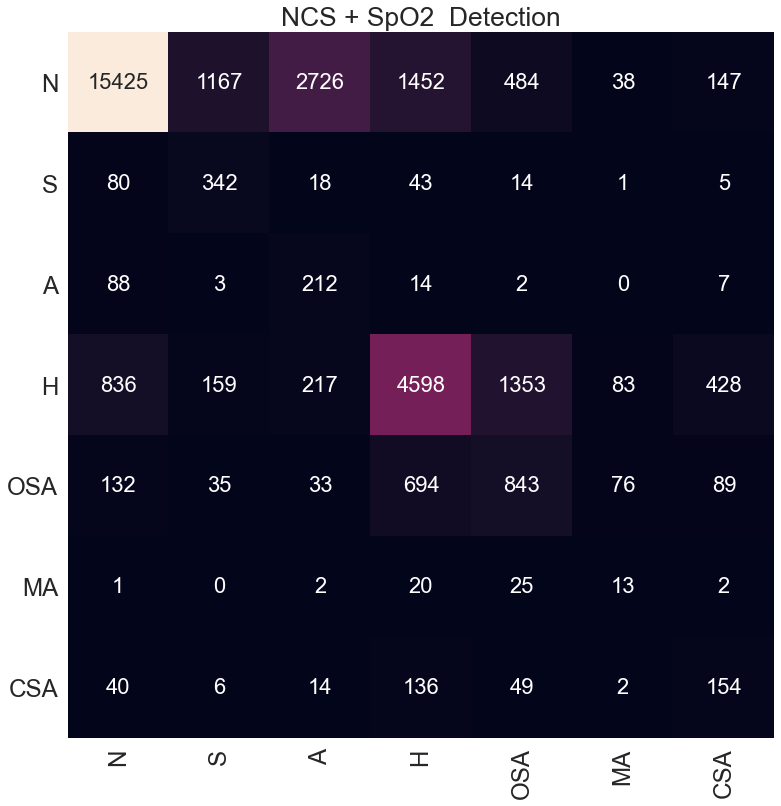

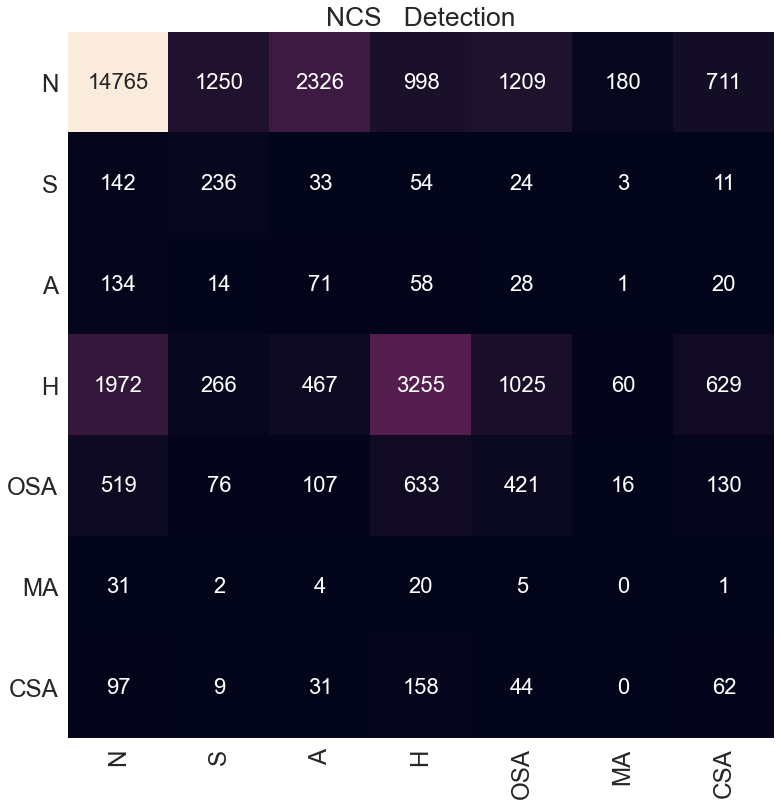

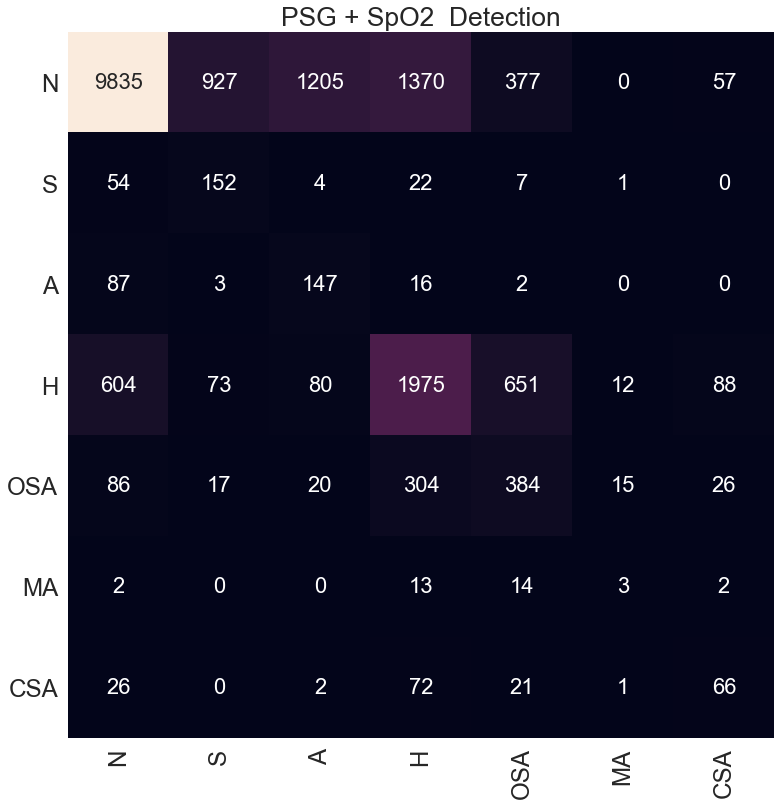

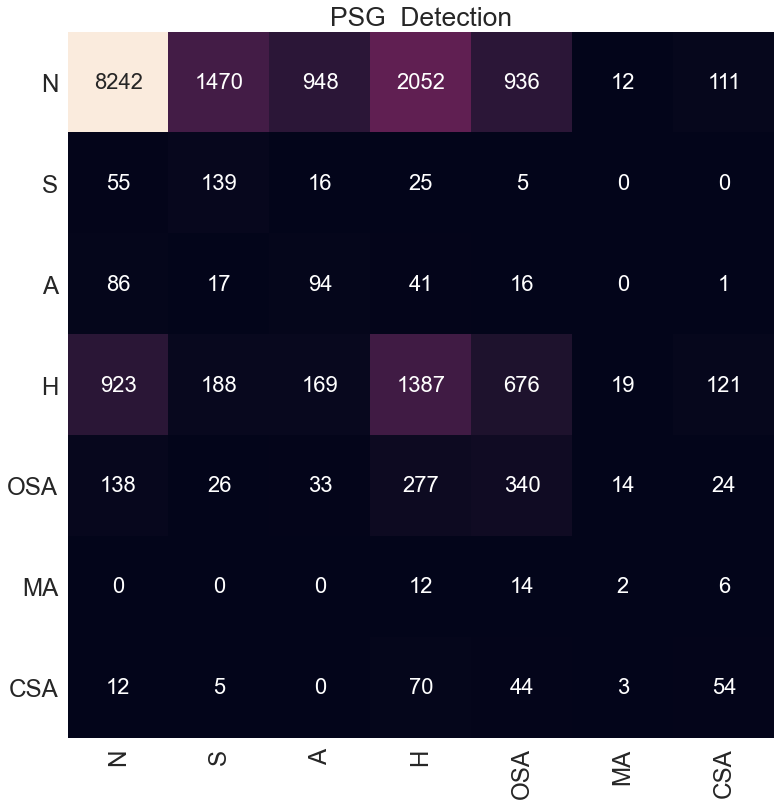

In [15]:
def plotfigFullClass(cm,acc,feat,impt,CVmethod,tle):

    labelNum=str(1)  #labelling method 1,2,3,4
    size=18
    name1=["N", "S","A","H","OSA","MA","CSA"]
    name2=name1
    w=15 #fig size 1      change when label num change
    h=13   #fig size 2
    

    
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=2.2)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':22})

    
    tleSave=tle+CVmethod+ labelNum
    plt.title(tle)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    FolderSave=r"C:/Users/zz587-admin/Documents/sleep center paper/figure/python/cm_detect/"
    plt.savefig(FolderSave+tleSave+r".png",dpi=300)


CVmethod3=' k-fold balance class'
plotfigFullClass(cm_NCS_del1_fc,acc_NCS_del1_fc,feat_NCS_del1_fc,impt_NCS_del1_fc,CVmethod3,tle1)
plotfigFullClass(cm_NCS_wo_del1_fc,acc_NCS_wo_del1_fc,feat_NCS_wo_del1_fc,impt_NCS_wo_del1_fc,CVmethod3,tle2)
plotfigFullClass(cm_PSG_del1_fc,acc_PSG_del1_fc,feat_PSG_del1_fc,impt_PSG_del1_fc,CVmethod3,tle3)
plotfigFullClass(cm_PSG_wo_del1_fc,acc_PSG_wo_del1_fc,feat_PSG_wo_del1_fc,impt_PSG_wo_del1_fc,CVmethod3,tle4)

